# Analysis : Team Build-Up and Progression Profiles – Premier League 2024/25

## Objective
This analysis aimed to understand how Premier League teams built their attacks and progressed the ball during the 2024/25 season. By examining key progression metrics, we sought to uncover:
- Which teams relied on structured build-up play.
- Which teams favored direct play or quick transitions.
- The players most involved in the deeper phases of play.

## Key Questions Analyzed
1. **Which teams recorded the highest xGChain per 90, indicating frequent involvement in valuable attacking sequences?**
2. **Which teams ranked highest in xGBuildup per 90, highlighting their reliance on patient build-up and progressive possession?**
3. **Which players served as the primary build-up contributors for their teams?**
4. **Was there a noticeable difference in progression styles between top-performing and lower-performing teams?**
5. **Could teams be classified based on their reliance on structured build-up versus direct attacking transitions?**

---
## Step 1: Importing Libraries & Loading Scraped Data

In this step, the essential libraries for data handling, visualization, and numerical analysis were imported. Additionally, the CSV file containing player performance statistics from the 2024/25 Premier League season, previously obtained through web scraping, was loaded for further analysis.

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['axes.grid'] = True

players_df = pd.read_csv('EPL_2024_25_Understat.csv')

---
## Step 2: Clean and Rename Columns

To enhance readability and maintain consistency throughout the analysis, certain columns were renamed using more intuitive and descriptive labels.

In [2]:
players_df.rename(columns={
    'games' : 'Games',
    'time' : 'Minutes Played',
    'goals' : 'Goals',
    'assists' : 'Assists',
    'shots' : 'Shots',
    'key_passes' : 'Key Passes',
    'yellow_cards' : 'Yellow Cards',
    'red_cards' : 'Red Cards',
    'position' : 'Position',
    'player_name': 'Player',
    'team_title': 'Team',
    'xGChain': 'xG Chain',
    'xGBuildup': 'xG Buildup'
}, inplace=True)

# Check the shape of the dataset
print("Dataset shape:", players_df.shape)

# List all column names
print("Columns:", players_df.columns)

Dataset shape: (562, 18)
Columns: Index(['id', 'Player', 'Games', 'Minutes Played', 'Goals', 'xG', 'Assists',
       'xA', 'Shots', 'Key Passes', 'Yellow Cards', 'Red Cards', 'Position',
       'Team', 'npg', 'npxG', 'xG Chain', 'xG Buildup'],
      dtype='object')


---
## Step 3: Cleaning Team Data for Multi-Club Players

During the season, some players transfer between clubs, which may result in multiple teams being listed in the dataset for a single player (e.g., "Arsenal, Fulham"). To ensure each player is correctly associated with only one team, the most recent club was retained.

In [3]:
players_df['Team'] = players_df['Team'].apply(lambda x: x.split(',')[-1].strip())

print("Unique teams after cleaning:")
print(players_df['Team'].unique())

Unique teams after cleaning:
['Liverpool' 'Newcastle United' 'Manchester City' 'Nottingham Forest'
 'Brentford' 'Aston Villa' 'Wolverhampton Wanderers' 'Chelsea'
 'Crystal Palace' 'West Ham' 'Fulham' 'Bournemouth' 'Ipswich' 'Tottenham'
 'Brighton' 'Leicester' 'Arsenal' 'Everton' 'Manchester United'
 'Southampton']


---
## Step 4: Data Preparation

In this step, the following processes were performed:
- **xG Chain per 90 minutes** and **xG Buildup per 90 minutes** were calculated to standardize player contributions based on playing time.
- Players with **less than 800 minutes played** were filtered out to ensure the analysis focused on regular contributors with a sufficient sample size.

In [4]:
# Calculate per 90 stats
players_df['xgChain per90'] = players_df['xG Chain'] / players_df['Minutes Played'] * 90
players_df['xgBuildup per90'] = players_df['xG Buildup'] / players_df['Minutes Played'] * 90

# Filter players with at least 800 minutes played
min_minutes = 800
players_filtered = players_df[players_df['Minutes Played'] >= min_minutes].copy()

players_filtered[['Player', 'Team', 'xgChain per90', 'xgBuildup per90']].head()

,Player,Team,xgChain per90,xgBuildup per90
0,Mohamed Salah,Liverpool,1.287804,0.430014
1,Alexander Isak,Newcastle United,0.835882,0.114150
2,Erling Haaland,Manchester City,0.747935,0.115745
3,Chris Wood,Nottingham Forest,0.438100,0.049679
4,Bryan Mbeumo,Brentford,0.641691,0.246173


---
## Step 5: Identifying Top xG Chain Contributors

In this step:
- Players were sorted based on their **xG Chain per 90 minutes** to identify those most frequently involved in valuable attacking sequences.
- The **Top 10 players** with the highest xG Chain per 90 were displayed to highlight key contributors to their team's attacking build-up and chance creation.

In [5]:
# Top 10 players by xG Chain per 90
top_xgchain_players = players_filtered.sort_values(by='xgChain per90', ascending=False).head(10)

top_xgchain_players[['Player', 'Team', 'xgChain per90']]

,Player,Team,xgChain per90
0,Mohamed Salah,Liverpool,1.287804
23,Cody Gakpo,Liverpool,1.009203
12,Luis Díaz,Liverpool,1.001020
79,Kevin De Bruyne,Manchester City,0.992195
55,Diogo Jota,Liverpool,0.988865
73,Darwin Núñez,Liverpool,0.981994
60,Dominik Szoboszlai,Liverpool,0.981395
111,Eddie Nketiah,Crystal Palace,0.869157
5,Yoane Wissa,Brentford,0.847914
57,Bukayo Saka,Arsenal,0.840323


---
## Step 6: Identifying Top xG Buildup Contributors

In this step:
- Players were sorted based on their **xG Buildup per 90 minutes** to highlight those who contributed significantly to attacking phases without directly taking shots or providing key passes.
- The **Top 10 players** with the highest xG Buildup per 90 were displayed to showcase those who excelled in build-up play and ball progression.

In [6]:
# Top 10 players by xG Buildup per 90
top_xgbuildup_players = players_filtered.sort_values(by='xgBuildup per90', ascending=False).head(10)

top_xgbuildup_players[['Player', 'Team', 'xgBuildup per90']]

,Player,Team,xgBuildup per90
255,Ian Maatsen,Aston Villa,0.701795
406,Konstantinos Tsimikas,Liverpool,0.657395
71,Alexis Mac Allister,Liverpool,0.654893
285,Kyle Walker,Manchester City,0.627293
245,Rico Lewis,Manchester City,0.608959
352,Manuel Akanji,Manchester City,0.607346
180,Ilkay Gündogan,Manchester City,0.589124
97,Virgil van Dijk,Liverpool,0.581551
200,Ibrahima Konaté,Liverpool,0.581004
410,Rúben Dias,Manchester City,0.579600


---
### Top Players by xG Chain per 90

The table below presented the top 10 players who were most involved in their team's attacking sequences based on **xG Chain per 90**. These players frequently participated in possessions that led to high-quality chances, indicating their central role in their team's offensive play.

### Top Players by xG Buildup per 90

The following table highlighted the top 10 players based on **xG Buildup per 90**, focusing on those who contributed significantly to build-up phases without necessarily being the direct creators or finishers. These players were typically deeper playmakers or midfield orchestrators essential to ball progression.

In [7]:
players_filtered[['Player', 'Team', 'Position', 'xgChain per90']]\
    .sort_values(by='xgChain per90', ascending=False)\
    .head(10)\
    .style.bar(subset=['xgChain per90'], color='#5fba7d')

,Player,Team,Position,xgChain per90
0,Mohamed Salah,Liverpool,F M,1.287804
23,Cody Gakpo,Liverpool,F M S,1.009203
12,Luis Díaz,Liverpool,F M S,1.001020
79,Kevin De Bruyne,Manchester City,F M S,0.992195
55,Diogo Jota,Liverpool,F S,0.988865
73,Darwin Núñez,Liverpool,F S,0.981994
60,Dominik Szoboszlai,Liverpool,F M S,0.981395
111,Eddie Nketiah,Crystal Palace,F M S,0.869157
5,Yoane Wissa,Brentford,F M S,0.847914
57,Bukayo Saka,Arsenal,F M S,0.840323


In [8]:
players_filtered[['Player', 'Team', 'Position', 'xgBuildup per90']]\
    .sort_values(by='xgBuildup per90', ascending=False)\
    .head(10)\
    .style.bar(subset=['xgBuildup per90'], color='#5f9bd8')

,Player,Team,Position,xgBuildup per90
255,Ian Maatsen,Aston Villa,D S,0.701795
406,Konstantinos Tsimikas,Liverpool,D S,0.657395
71,Alexis Mac Allister,Liverpool,M S,0.654893
285,Kyle Walker,Manchester City,D S,0.627293
245,Rico Lewis,Manchester City,D M S,0.608959
352,Manuel Akanji,Manchester City,D S,0.607346
180,Ilkay Gündogan,Manchester City,M S,0.589124
97,Virgil van Dijk,Liverpool,D,0.581551
200,Ibrahima Konaté,Liverpool,D S,0.581004
410,Rúben Dias,Manchester City,D S,0.579600


---
## Step 7: Visualizing xG Chain vs. xG Buildup Contribution

In this step:
- A scatter plot was created to visualize the relationship between **xG Chain per 90** and **xG Buildup per 90** across all players.
- This visualization helped identify:
  - Players who were highly involved in both the build-up phases and the overall attacking sequences.
  - Players who primarily contributed through either build-up play or direct attacking involvement, but not both.

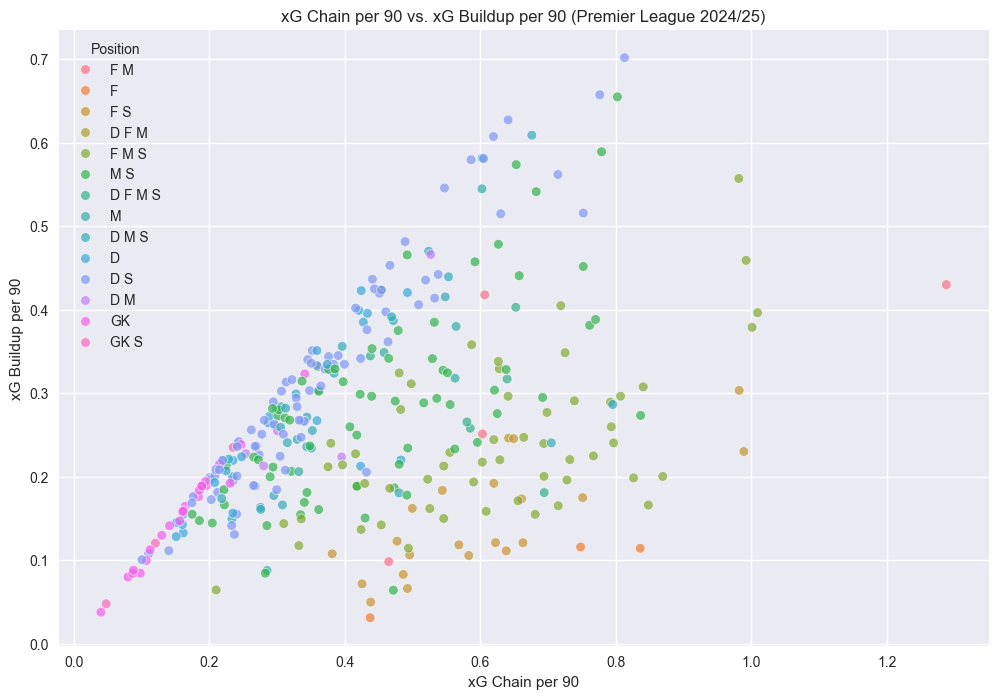

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(data=players_filtered, x='xgChain per90', y='xgBuildup per90', hue='Position', alpha=0.7)

plt.title('xG Chain per 90 vs. xG Buildup per 90 (Premier League 2024/25)')
plt.xlabel('xG Chain per 90')
plt.ylabel('xG Buildup per 90')
plt.legend(title='Position')
plt.grid(True)
plt.show()

### Key Takeaways from the Scatter Plot :

The scatter plot visualized the relationship between **xG Chain per 90** and **xG Buildup per 90** across different player positions.

#### Positional Trends:
- **Forwards** generally appeared with higher involvement in xG Chain but lower contributions to build-up play, indicating their primary focus on finishing and direct attacking involvement.
- **Midfielders** often demonstrated balanced or higher xG Buildup involvement, reflecting their critical role in ball progression and structured build-up without necessarily being the final shooter or assister.
- **Defenders and Goalkeepers** were typically clustered towards the lower end of both metrics, aligning with their limited involvement in attacking sequences.

---

## Step 8: Team-Wise xG Buildup Influence

In this step:
- The **average xG Buildup per 90** was calculated for each team to assess their collective build-up influence.
- This analysis highlighted which teams emphasized structured, team-oriented ball progression and which teams relied more on individual creativity or direct transitions.
- A bar plot was created to visualize and compare the build-up profiles across all Premier League teams for the 2024/25 season.

C:\Users\Admin\AppData\Local\Temp\ipykernel_2540\3661389770.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_buildup.values, y=team_buildup.index, palette='viridis')


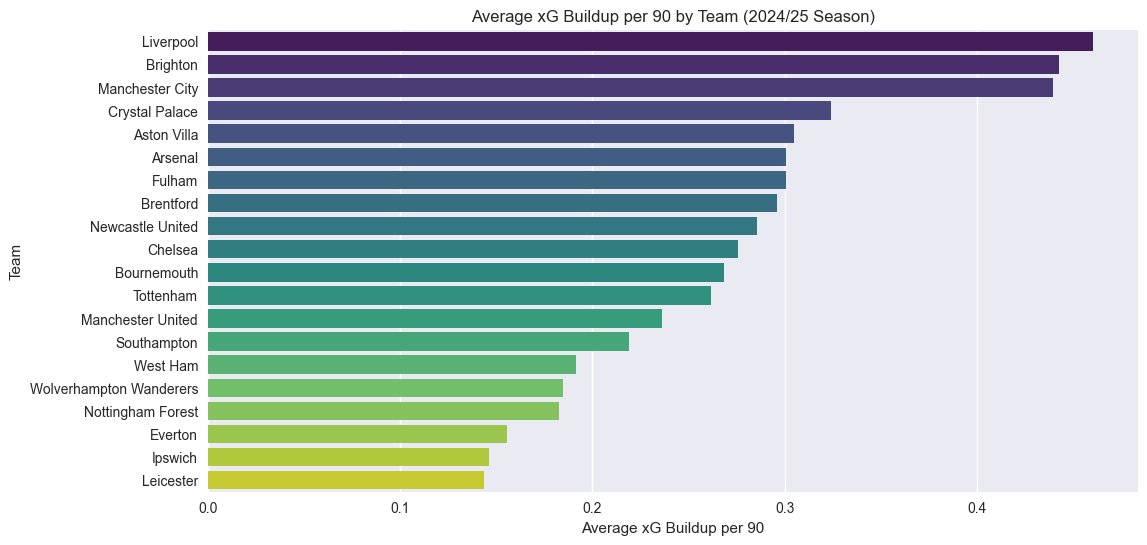

In [10]:
# Calculate team-wise average xG Buildup per 90
team_buildup = players_df.groupby('Team')['xgBuildup per90'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=team_buildup.values, y=team_buildup.index, palette='viridis')
plt.title('Average xG Buildup per 90 by Team (2024/25 Season)')
plt.xlabel('Average xG Buildup per 90')
plt.ylabel('Team')
plt.show()

### Key Takeaways :

The **xG Buildup per 90** analysis highlighted the teams that relied most on structured, team-oriented build-up play rather than direct goal attempts or individual efforts.

- **Liverpool, Brighton, and Manchester City** stood out with the highest build-up contributions. These teams consistently demonstrated possession-based styles, emphasizing patient progression, short passing sequences, and collective involvement in offensive phases.

- **Crystal Palace, Aston Villa, and Arsenal** also exhibited strong reliance on build-up play, though with slightly less emphasis compared to the top three.

- In contrast, **Everton, Ipswich, and Leicester** recorded the lowest build-up contributions, suggesting a preference for quicker, more direct attacking styles that often bypassed extensive build-up phases.

- **Manchester United and Tottenham** occupied middle positions in this metric, indicating a balanced approach between structured build-up and direct attacking transitions.

This analysis effectively differentiated possession-heavy, system-based teams from those favoring rapid attacks or individual creativity to generate chances.

---

## Step 9: Position-Wise Aggregation – Average Buildup and Chance Involvement by Position

In this step, the analysis focused on how player involvement in build-up and chance creation varied by position.

The following metrics were computed:
- **Average xG Chain per 90 minutes** for each position.
- **Average xG Buildup per 90 minutes** for each position.

This evaluation provided insights into which positions were most actively contributing to team build-up phases and overall attacking sequences. It also helped determine whether certain positions played a more significant role in progressing the ball and creating chances.

---

### Position Codes Explanation

The dataset utilized shorthand codes to represent player positions. The positional breakdown was as follows:

- **F**: Forward  
- **M**: Midfielder  
- **D**: Defender  
- **S**: Striker (players primarily operating as central forwards)  
- **GK**: Goalkeeper  

Combinations such as **F M** or **D F M S** indicated players who played in multiple positions throughout the season. The interpretation of these combinations was:

- **F M**: Played as both Forward and Midfielder  
- **F S**: Played as Forward and Striker  
- **F M S**: Operated as Forward, Midfielder, and Striker  
- **D F M**: Played as Defender, Forward, and Midfielder  
- **M S**: Played as Midfielder and Striker  
- **D F M S**: Highly versatile players who featured in almost all outfield roles  
- **D M S**: Played as Defender, Midfielder, and Striker  
- **GK S**: Goalkeepers who made occasional substitute appearances in outfield positions

In [11]:
# Group by Position and calculate the mean for xG Chain per 90 and xG Buildup per 90
position_summary = players_df.groupby('Position')[['xgChain per90', 'xgBuildup per90']].mean().reset_index()

# Sort by xG Chain per 90
position_summary = position_summary.sort_values(by='xgChain per90', ascending=False)

position_summary

,Position,xgChain per90,xgBuildup per90
7,F M,0.740514,0.299253
6,F,0.673686,0.086959
1,D F M,0.641691,0.246173
9,F S,0.638872,0.179114
8,F M S,0.601232,0.235693
14,S,0.598984,0.253594
2,D F M S,0.565826,0.283239
13,M S,0.534120,0.322301
12,M,0.503774,0.359490
4,D M S,0.388223,0.271040


---
## Step 10: Visualizing Position-Wise Buildup and Chance Involvement

To better understand how player involvement differed across positions, a grouped bar plot was created to compare:
- **Average xG Chain per 90 minutes:** Representing involvement in overall chance creation.
- **Average xG Buildup per 90 minutes:** Representing contribution in the build-up phases without taking the shot or providing the key pass.

This visualization clearly illustrated:
- Which positions were more actively involved in finishing and creating chances.
- Which positions were more responsible for progressing the ball and supporting the build-up play.

The analysis complemented the earlier findings and visually distinguished the offensive roles played by different positions.

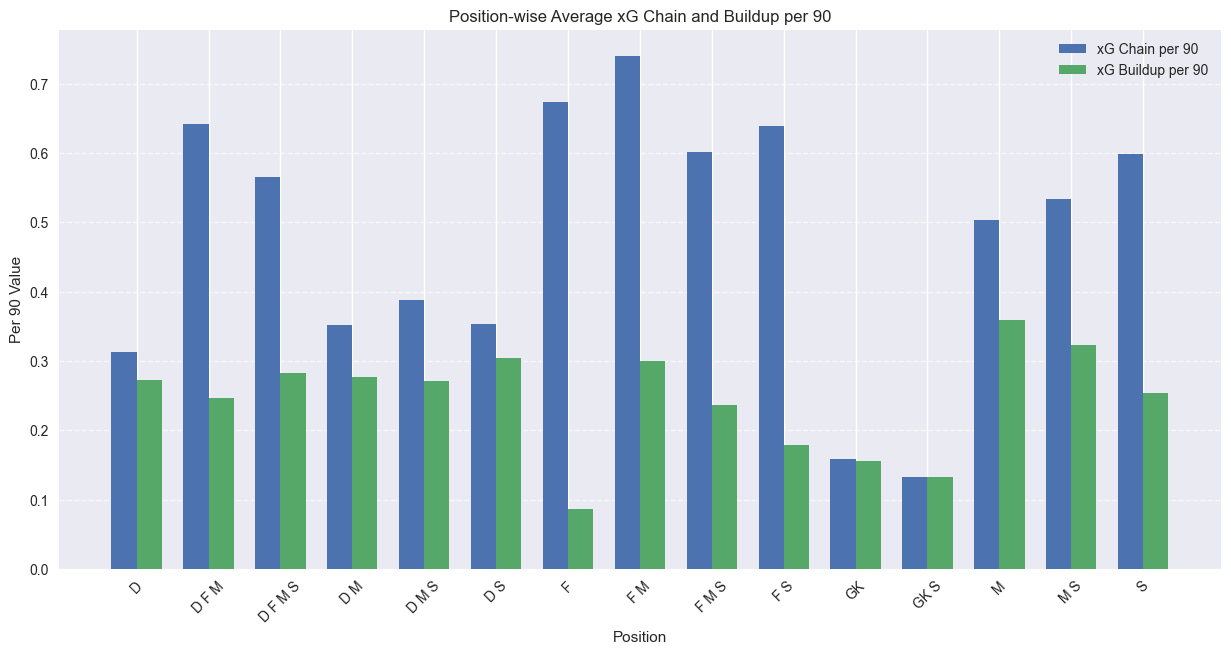

In [12]:
# Group by Position and calculate mean per 90 stats
position_group = players_df.groupby('Position')[['xgChain per90', 'xgBuildup per90']].mean().reset_index()
import numpy as np

positions = position_group['Position']
xg_chain = position_group['xgChain per90']
xg_buildup = position_group['xgBuildup per90']

x = np.arange(len(positions))
width = 0.35  # Bar width

plt.figure(figsize=(15, 7))
bar1 = plt.bar(x - width/2, xg_chain, width, label='xG Chain per 90')
bar2 = plt.bar(x + width/2, xg_buildup, width, label='xG Buildup per 90')

plt.xlabel('Position')
plt.ylabel('Per 90 Value')
plt.title('Position-wise Average xG Chain and Buildup per 90')
plt.xticks(x, positions, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Key Takeaways :

From the analysis:
- **Versatile Forwards/Midfielders (F M)** and **pure Forwards (F)** demonstrated the highest average xG Chain per 90 minutes, indicating their strong involvement in chance creation and overall offensive sequences.
- Players classified as **D F M** (highly versatile outfield players) also contributed significantly, suggesting that these multi-role players frequently drove both the buildup and chance creation phases.
- **Midfielders (M)**, while not leading in xG Chain, recorded the highest **xG Buildup per 90 minutes**, which aligned with their typical role as the primary orchestrators in the buildup without necessarily being involved in the final attacking action.
- **Goalkeepers (GK)** and **GK S** displayed the lowest involvement in both metrics, consistent with their primary defensive duties.

Overall, this position-wise breakdown reinforced that the most active creators were forwards with midfield flexibility, while midfielders were the key contributors in structured buildup phases.

---